<a href="https://colab.research.google.com/github/MihaelaCatan04/FAF_AA_LABS/blob/main/Laboratory_Work_No_2/Sorting_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
!pip install ffmpeg-python

In [3]:
def run_sorting_algorithm(sorting_algorithm, algorithm_name):
    test_cases = {
        "Random array": [64, 34, 25, 12, 22, 11, 90, 5, 88, 43, 55, 67, 72, 99, 31, 15, 58, 50, 33, 75, 20, 81, 13, 27, 98, 41, 37, 56, 44, 66, 39, 46, 51, 74, 59, 60, 65, 76, 23, 29],
        "Increasing-order sorted array": [5, 11, 12, 13, 15, 20, 22, 23, 25, 27, 29, 31, 33, 34, 37, 39, 41, 43, 44, 46, 50, 51, 55, 56, 58, 59, 60, 64, 65, 66, 67, 72, 74, 75, 76, 81, 88, 90, 98, 99],
        "Decreasing-order sorted array": [99, 98, 90, 88, 81, 76, 75, 74, 72, 67, 66, 65, 64, 60, 59, 58, 56, 55, 51, 50, 46, 44, 43, 41, 39, 37, 34, 33, 31, 29, 27, 25, 23, 22, 20, 15, 13, 12, 11, 5],
        "Array with duplicate elements": [64, 34, 25, 12, 22, 11, 34, 5, 64, 5, 55, 67, 72, 34, 31, 15, 58, 64, 5, 75, 20, 81, 13, 27, 98, 5, 37, 64, 44, 66, 39, 5, 51, 74, 59, 60, 65, 76, 5, 29]
    }

    results = []

    for name, array in test_cases.items():
        array_copy = array.copy()
        start_time = time.time()
        sorting_algorithm(array_copy)
        end_time = time.time()
        elapsed_time = end_time - start_time

        results.append((algorithm_name, name, elapsed_time))

    return results

## Quick Sort

As the name suggests, Quicksort is one of the fastest sorting algorithms.

The Quicksort algorithm takes an array of values, chooses one of the values as the 'pivot' element, and moves the other values so that lower values are on the left of the pivot element, and higher values are on the right of it.


How it works:

1. Choose a value in the array to be the pivot element.
2. Order the rest of the array so that lower than or equal values to the pivot element are on the left, and higher values are on the right.
3. Swap the pivot element with the first element of the higher values so that the pivot element lands in between the lower and higher values.
4. Do the same operations (recursively) for the sub-arrays on the left and right side of the pivot element.

Manual Run Through:

**Step 1:** We start with an unsorted array.
```
[ 11, 9, 12, 7, 3]
```
**Step 2:** We choose the last value 3 as the pivot element.
```
[ 11, 9, 12, 7, 3]
```
**Step 3:** The rest of the values in the array are all greater than 3, and must be on the right side of 3. Swap 3 with 11.
```
[ 3, 9, 12, 7, 11]
```
**Step 4:** Value 3 is now in the correct position. We need to sort the values to the right of 3. We choose the last value 11 as the new pivot element.
```
[ 3, 9, 12, 7, 11]
```
**Step 5:** The value 7 must be to the left of pivot value 11, and 12 must be to the right of it. Move 7 and 12.
```
[ 3, 9, 7, 12, 11]
```
**Step 6:** Swap 11 with 12 so that lower values 9 and 7 are on the left side of 11, and 12 is on the right side.
```
[ 3, 9, 7, 11, 12]
```
**Step 7:** 11 and 12 are in the correct positions. We choose 7 as the pivot element in sub-array [ 9, 7], to the left of 11.
```
[ 3, 9, 7, 11, 12]
```
**Step 8:** We must swap 9 with 7.
```
[ 3, 7, 9, 11, 12]
```
And now, the array is sorted.


Sorting in increasing order:

In [4]:
# Partition function
def partition(array, low, high):
    pivot = array[high]
    i = low
    j = high - 1

    while i < j:
      while i < high and array[i] <= pivot:
        i += 1
      while j > low and array[j] > pivot:
        j -= 1
      if i < j:
        array[i], array[j] = array[j], array[i]
    if array[i] > pivot:
      array[i], array[high] = array[high], array[i]
    return i

# Quick sort function
def quicksort(array, low=0, high=None):
    if high is None:
        high = len(array) - 1

    if low < high:
        pivot_index = partition(array, low, high)
        quicksort(array, low, pivot_index-1)
        quicksort(array, pivot_index+1, high)

In [5]:
quicksort_results = run_sorting_algorithm(quicksort, "Quick Sort")
print(quicksort_results)

[('Quick Sort', 'Random array', 6.0558319091796875e-05), ('Quick Sort', 'Increasing-order sorted array', 8.749961853027344e-05), ('Quick Sort', 'Decreasing-order sorted array', 8.749961853027344e-05), ('Quick Sort', 'Array with duplicate elements', 4.4345855712890625e-05)]


The worst case scenario for Quicksort is
O(n^2). This is when the pivot element is either the highest or lowest value in every sub-array, which leads to a lot of recursive calls. With our implementation above, this happens when the array is already sorted.

But on average, the time complexity for Quicksort is actually just
O(nlogn), which is a lot better than for the previous sorting algorithms we have looked at. That is why Quicksort is so popular.

The space complexity is O(log n) due to the recursive call stack.

### Visual Representation

In [6]:
my_array = [64, 34, 25, 12, 22, 11, 90, 5, 88, 43]
array_to_sort = my_array.copy()
array_states = []
pivot_states = []
i_states = []
j_states = []

In [7]:
# Snapshot function to capture the current state
def snapshot(array, high, i, j):
    array_states.append(array.copy())
    pivot_states.append(high)  # Pivot is at high initially
    i_states.append(i)
    j_states.append(j)

In [8]:
# Partition function with visualization states
def partition_video(array, low, high):
    pivot = array[high]
    i = low
    j = high - 1

    # Initial state
    snapshot(array, high, i, j)

    while i < j:
        # Moving i pointer
        while i < high and array[i] <= pivot:
            i += 1
            snapshot(array, high, i, j)

        # Moving j pointer
        while j > low and array[j] > pivot:
            j -= 1
            snapshot(array, high, i, j)

        # Swap if i < j
        if i < j:
            array[i], array[j] = array[j], array[i]
            snapshot(array, high, i, j)

    # Final swap with pivot if needed
    if array[i] > pivot:
        array[i], array[high] = array[high], array[i]
        snapshot(array, i, i, j)  # Pivot is now at i

    return i

# Quick sort function
def quicksort_video(array, low=0, high=None):
    if high is None:
        high = len(array) - 1

    if low < high:
        pivot_index = partition_video(array, low, high)
        quicksort_video(array, low, pivot_index-1)
        quicksort_video(array, pivot_index+1, high)

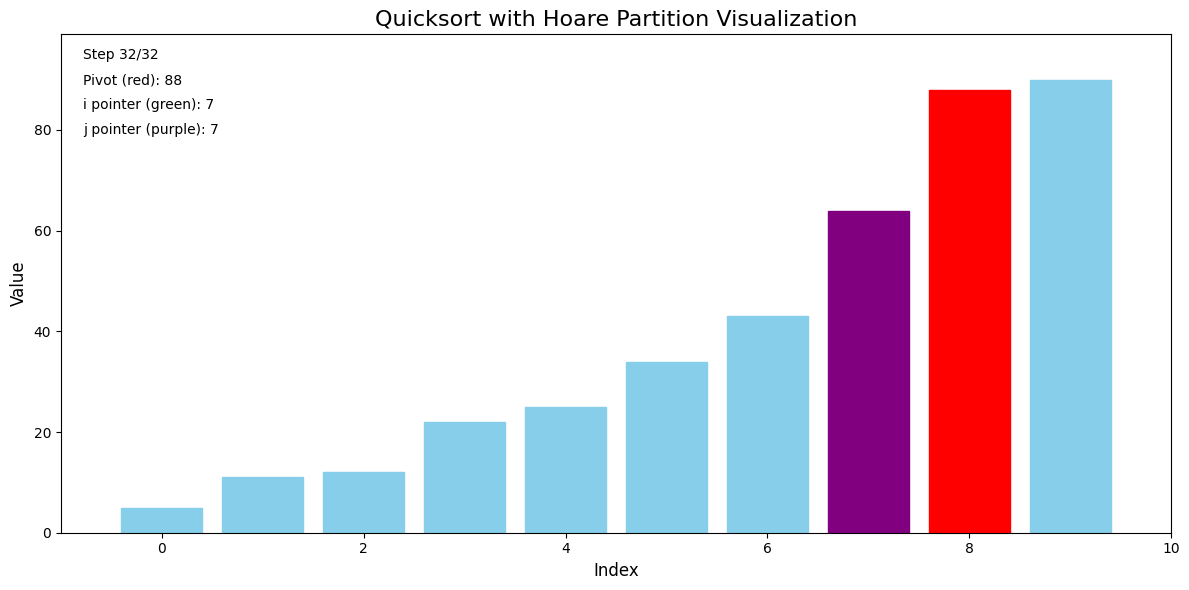

In [9]:
# Run quicksort and collect states
quicksort_video(array_to_sort)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize the bar plot
bar_container = ax.bar(range(len(my_array)), array_states[0], color='skyblue', edgecolor='black')

# Set axis limits
ax.set_xlim(-1, len(my_array))
ax.set_ylim(0, max(my_array) * 1.1)

# Set title and labels
ax.set_title('Quicksort with Hoare Partition Visualization', fontsize=16)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

# Text elements for annotations
text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=10)
pivot_annotation = ax.text(0.02, 0.90, '', transform=ax.transAxes, fontsize=10)
i_annotation = ax.text(0.02, 0.85, '', transform=ax.transAxes, fontsize=10)
j_annotation = ax.text(0.02, 0.80, '', transform=ax.transAxes, fontsize=10)

def update(frame):
    # Update the heights of the bars
    for i, bar in enumerate(bar_container):
        bar.set_height(array_states[frame][i])

    # Reset all colors
    for bar in bar_container:
        bar.set_color('skyblue')

    # Color the pivot element
    pivot_idx = pivot_states[frame]
    bar_container[pivot_idx].set_color('red')

    # Color the i and j pointers
    i_idx = i_states[frame]
    j_idx = j_states[frame]

    if i_idx < len(bar_container):
        bar_container[i_idx].set_color('green')

    if j_idx < len(bar_container) and j_idx >= 0:
        bar_container[j_idx].set_color('purple')

    # Update the text annotations
    text.set_text(f'Step {frame+1}/{len(array_states)}')
    pivot_annotation.set_text(f'Pivot (red): {array_states[frame][pivot_idx]}')
    i_annotation.set_text(f'i pointer (green): {i_idx}')
    j_annotation.set_text(f'j pointer (purple): {j_idx}')

    return bar_container

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(array_states),
                              interval=200, blit=False, repeat=True)

# Adjust layout
plt.tight_layout()

# To save the animation as a video file
ani.save('quicksort_visualization.mp4', writer='ffmpeg', fps=5)

# To display the animation in a notebook or interactive environment
plt.show()

### Optimized quick sort

In [10]:
# Quick sort with Tail Recursion Optimization
def quicksort_tail(array, low=0, high=None):
    if high is None:
        high = len(array) - 1

    while low < high:
        pivot_index = partition(array, low, high)

        # Sort the smaller partition recursively
        if pivot_index - low < high - pivot_index:
            quicksort_tail(array, low, pivot_index - 1)
            low = pivot_index + 1  # Tail recursion (converted to loop)
        else:
            quicksort_tail(array, pivot_index + 1, high)
            high = pivot_index - 1  # Tail recursion (converted to loop)

In [11]:
quicksort_optimized_results = run_sorting_algorithm(quicksort_tail, "Optimized Quick Sort")
print(quicksort_optimized_results)

[('Optimized Quick Sort', 'Random array', 4.601478576660156e-05), ('Optimized Quick Sort', 'Increasing-order sorted array', 7.748603820800781e-05), ('Optimized Quick Sort', 'Decreasing-order sorted array', 8.0108642578125e-05), ('Optimized Quick Sort', 'Array with duplicate elements', 3.886222839355469e-05)]


The smaller partition is always sorted first using recursion. The larger partition is sorted using a while loop instead of recursion. This reduces the maximum recursion depth from O(n) to O(log n), preventing stack overflow in large datasets.

## Merge Sort

The Merge Sort algorithm is a divide-and-conquer algorithm that sorts an array by first breaking it down into smaller arrays, and then building the array back together the correct way so that it is sorted.

**Divide:** The algorithm starts with breaking up the array into smaller and smaller pieces until one such sub-array only consists of one element.

**Conquer:** The algorithm merges the small pieces of the array back together by putting the lowest values first, resulting in a sorted array.

The breaking down and building up of the array to sort the array is done recursively.

How it works:

1. Divide the unsorted array into two sub-arrays, half the size of the original.
2. Continue to divide the sub-arrays as long as the current piece of the array has more than one element.
3. Merge two sub-arrays together by always putting the lowest value first.
Keep merging until there are no sub-arrays left.

Manual Run Through

**Step 1:** We start with an unsorted array, and we know that it splits in half until the sub-arrays only consist of one element. The Merge Sort function calls itself two times, once for each half of the array. That means that the first sub-array will split into the smallest pieces first.


```
[ 12, 8, 9, 3, 11, 5, 4]
[ 12, 8, 9] [ 3, 11, 5, 4]
[ 12] [ 8, 9] [ 3, 11, 5, 4]
[ 12] [ 8] [ 9] [ 3, 11, 5, 4]
```

**Step 2:** The splitting of the first sub-array is finished, and now it is time to merge. 8 and 9 are the first two elements to be merged. 8 is the lowest value, so that comes before 9 in the first merged sub-array.

```
[ 12] [ 8, 9] [ 3, 11, 5, 4]
```
**Step 3:** The next sub-arrays to be merged is [ 12] and [ 8, 9]. Values in both arrays are compared from the start. 8 is lower than 12, so 8 comes first, and 9 is also lower than 12.
```
[ 8, 9, 12] [ 3, 11, 5, 4]
```
**Step 4:** Now the second big sub-array is split recursively.
```
[ 8, 9, 12] [ 3, 11, 5, 4]
[ 8, 9, 12] [ 3, 11] [ 5, 4]
[ 8, 9, 12] [ 3] [ 11] [ 5, 4]
```
**Step 5:** 3 and 11 are merged back together in the same order as they are shown because 3 is lower than 11.
```
[ 8, 9, 12] [ 3, 11] [ 5, 4]
```
**Step 6:** Sub-array with values 5 and 4 is split, then merged so that 4 comes before 5.
```
[ 8, 9, 12] [ 3, 11] [ 5] [ 4]
[ 8, 9, 12] [ 3, 11] [ 4, 5]
```
**Step 7:** The two sub-arrays on the right are merged. Comparisons are done to create elements in the new merged array:
1. 3 is lower than 4
2. 4 is lower than 11
3. 5 is lower than 11
4. 11 is the last remaining value


```
[ 8, 9, 12] [ 3, 4, 5, 11]
```
**Step 8:** The two last remaining sub-arrays are merged. Let's look at how the comparisons are done in more detail to create the new merged and finished sorted array:

3 is lower than 8:

```
Before [ 8, 9, 12] [ 3, 4, 5, 11]
After: [ 3, 8, 9, 12] [ 4, 5, 11]
```

**Step 9:** 4 is lower than 8:

```
Before [ 3, 8, 9, 12] [ 4, 5, 11]
After: [ 3, 4, 8, 9, 12] [ 5, 11]
```
**Step 10:** 5 is lower than 8:

```
Before [ 3, 4, 8, 9, 12] [ 5, 11]
After: [ 3, 4, 5, 8, 9, 12] [ 11]
```
**Step 11:** 8 and 9 are lower than 11:

```
Before [ 3, 4, 5, 8, 9, 12] [ 11]
After: [ 3, 4, 5, 8, 9, 12] [ 11]
```
**Step 12:** 11 is lower than 12:

```
Before [ 3, 4, 5, 8, 9, 12] [ 11]
After: [ 3, 4, 5, 8, 9, 11, 12]
```

The sorting is finished!

In [12]:
def merge_sort(arr):
  if len(arr) > 1:
    left_arr = arr[:len(arr)//2]
    right_arr = arr[len(arr)//2:]

    # Recursion
    merge_sort(left_arr)
    merge_sort(right_arr)

    # Merging
    i = 0
    j = 0
    k = 0 # merged array index

    while i < len(left_arr) and j < len(right_arr):
      if left_arr[i] < right_arr[j]:
        arr[k] = left_arr[i]
        i += 1
        k += 1
      else:
        arr[k] = right_arr[j]
        j += 1
        k += 1
    while i < len(left_arr):
      arr[k] = left_arr[i]
      i += 1
      k += 1
    while j < len(right_arr):
      arr[k] = right_arr[j]
      j += 1
      k += 1

In [13]:
mergesort_results = run_sorting_algorithm(merge_sort, "Merge Sort")
print(mergesort_results)

[('Merge Sort', 'Random array', 8.153915405273438e-05), ('Merge Sort', 'Increasing-order sorted array', 5.2928924560546875e-05), ('Merge Sort', 'Decreasing-order sorted array', 6.175041198730469e-05), ('Merge Sort', 'Array with duplicate elements', 8.034706115722656e-05)]


### Visual Representation

In [14]:
import copy

# Initial array
my_array = [64, 34, 25, 12, 22, 11, 90, 5, 88, 43]

# Arrays to store states for visualization
array_states = []  # States of the entire array
subarray_positions = []  # Track which subarrays are being worked on
highlight_indices = []  # Indices being compared or modified
operation_types = []  # Type of operation: 'split', 'compare', 'insert'
recursive_depth = []  # Track recursion depth

In [15]:
# Add a state to our visualization
def add_state(arr, positions=None, highlights=None, op_type='initial', depth=0):
    array_states.append(copy.deepcopy(arr))
    subarray_positions.append(positions if positions else [])
    highlight_indices.append(highlights if highlights else [])
    operation_types.append(op_type)
    recursive_depth.append(depth)

In [16]:
# Initialize with the starting array
add_state(my_array.copy())

In [17]:
# Modified merge sort using your original algorithm but with visualization
def merge_sort_video(arr, start_idx=0, depth=0):
    # Record the state at the beginning of this recursive call
    global_arr = array_states[-1].copy()
    add_state(global_arr, [start_idx, start_idx + len(arr) - 1], [], 'split', depth)

    if len(arr) > 1:
        mid = len(arr) // 2
        left_arr = arr[:mid]
        right_arr = arr[mid:]

        # Show the split
        global_arr = array_states[-1].copy()
        add_state(global_arr,
                 [[start_idx, start_idx + mid - 1], [start_idx + mid, start_idx + len(arr) - 1]],
                 [], 'divide', depth)

        # Recursion for left sub-array
        merge_sort_video(left_arr, start_idx, depth + 1)

        # Recursion for right sub-array
        merge_sort_video(right_arr, start_idx + mid, depth + 1)

        # Merging phase - initialize indices
        i = 0  # Index for left array
        j = 0  # Index for right array
        k = 0  # Index for merged array

        # Record the state before merging begins
        global_arr = array_states[-1].copy()
        add_state(global_arr,
                 [start_idx, start_idx + len(arr) - 1],
                 [], 'merge-start', depth)

        # Compare elements of both sub-arrays and merge
        while i < len(left_arr) and j < len(right_arr):
            # Show comparison state
            global_arr = array_states[-1].copy()
            add_state(global_arr,
                     [start_idx, start_idx + len(arr) - 1],
                     [start_idx + i, start_idx + mid + j],
                     'compare', depth)

            if left_arr[i] < right_arr[j]:
                # Show insertion from left array
                arr[k] = left_arr[i]
                global_arr = array_states[-1].copy()
                global_arr[start_idx + k] = left_arr[i]
                add_state(global_arr,
                         [start_idx, start_idx + len(arr) - 1],
                         [start_idx + k],
                         'insert-left', depth)
                i += 1
            else:
                # Show insertion from right array
                arr[k] = right_arr[j]
                global_arr = array_states[-1].copy()
                global_arr[start_idx + k] = right_arr[j]
                add_state(global_arr,
                         [start_idx, start_idx + len(arr) - 1],
                         [start_idx + k],
                         'insert-right', depth)
                j += 1
            k += 1

        # Copy remaining elements from left array, if any
        while i < len(left_arr):
            arr[k] = left_arr[i]
            global_arr = array_states[-1].copy()
            global_arr[start_idx + k] = left_arr[i]
            add_state(global_arr,
                     [start_idx, start_idx + len(arr) - 1],
                     [start_idx + k],
                     'insert-remaining-left', depth)
            i += 1
            k += 1

        # Copy remaining elements from right array, if any
        while j < len(right_arr):
            arr[k] = right_arr[j]
            global_arr = array_states[-1].copy()
            global_arr[start_idx + k] = right_arr[j]
            add_state(global_arr,
                     [start_idx, start_idx + len(arr) - 1],
                     [start_idx + k],
                     'insert-remaining-right', depth)
            j += 1
            k += 1

        # Show final merged subarray
        global_arr = array_states[-1].copy()
        add_state(global_arr,
                 [start_idx, start_idx + len(arr) - 1],
                 list(range(start_idx, start_idx + len(arr))),
                 'merge-complete', depth)

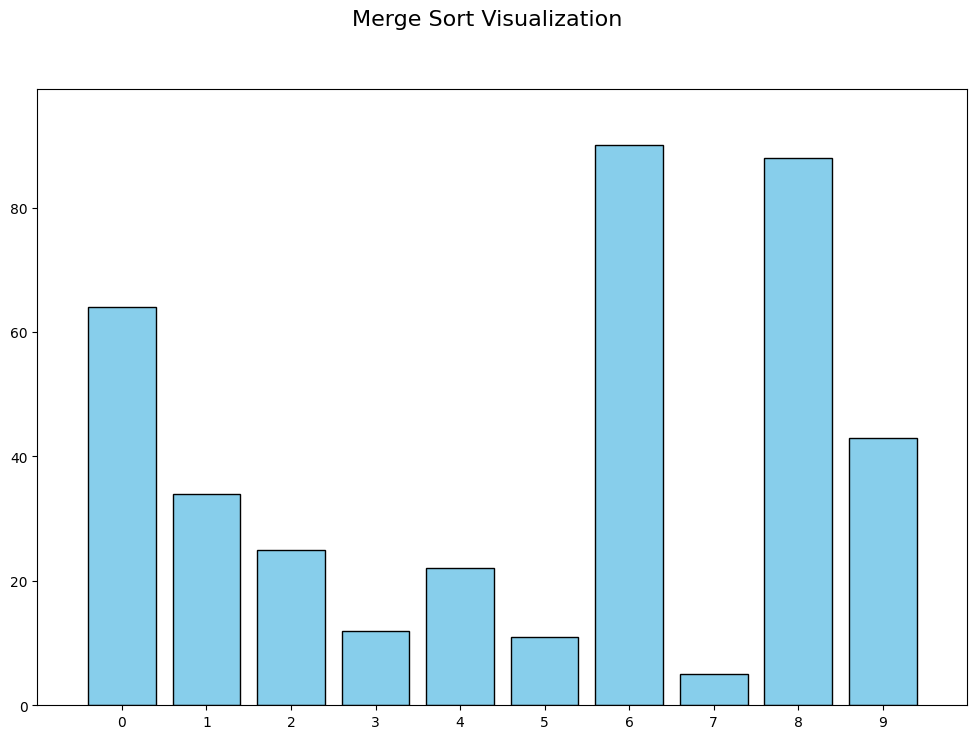

In [18]:
# Run the algorithm on a copy of the original array
array_to_sort = my_array.copy()
merge_sort_video(array_to_sort)

# Create the figure for visualization
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Merge Sort Visualization', fontsize=16)

# Initialize the bar chart
bar_container = ax.bar(range(len(my_array)), array_states[0], color='skyblue', edgecolor='black')

# Set axis limits
ax.set_xlim(-1, len(my_array))
ax.set_ylim(0, max(my_array) * 1.1)
ax.set_xticks(range(len(my_array)))
ax.set_xticklabels(range(len(my_array)))

# Add text annotations for visualization
step_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=10)
operation_text = ax.text(0.02, 0.90, '', transform=ax.transAxes, fontsize=10)
depth_text = ax.text(0.02, 0.85, '', transform=ax.transAxes, fontsize=10)
compare_text = ax.text(0.02, 0.80, '', transform=ax.transAxes, fontsize=10)

# Color maps for visualization
depth_colors = plt.cm.viridis(np.linspace(0, 1, 10))

In [19]:
def update(frame):
    # Update the heights of the bars
    for i, bar in enumerate(bar_container):
        bar.set_height(array_states[frame][i])

    # Reset all bar colors
    for bar in bar_container:
        bar.set_color('skyblue')
        bar.set_edgecolor('black')

    # Get current state information
    positions = subarray_positions[frame]
    highlights = highlight_indices[frame]
    op_type = operation_types[frame]
    depth = recursive_depth[frame]

    # Color the active subarray based on depth
    if isinstance(positions, list) and len(positions) > 0:
        if isinstance(positions[0], list):  # Multiple subarrays (divide phase)
            for subarray in positions:
                if len(subarray) >= 2:
                    start, end = subarray
                    for i in range(start, end + 1):
                        if i < len(bar_container):
                            bar_container[i].set_color(depth_colors[depth % len(depth_colors)])
        else:  # Single subarray
            if len(positions) >= 2:
                start, end = positions
                for i in range(start, end + 1):
                    if i < len(bar_container):
                        bar_container[i].set_color(depth_colors[depth % len(depth_colors)])

    # Highlight specific elements
    for idx in highlights:
        if 0 <= idx < len(bar_container):
            if op_type.startswith('compare'):
                bar_container[idx].set_color('orange')  # Comparing elements
            elif op_type.startswith('insert'):
                bar_container[idx].set_color('green')   # Inserting elements

    # Update text annotations
    step_text.set_text(f'Step {frame+1}/{len(array_states)}')
    depth_text.set_text(f'Recursive Depth: {depth}')

    # Detailed operation description
    op_description = ""
    if op_type == 'initial':
        op_description = "Initial array"
    elif op_type == 'split':
        op_description = "Entering recursive call"
    elif op_type == 'divide':
        op_description = "Dividing array into subarrays"
    elif op_type == 'merge-start':
        op_description = "Starting merge process"
    elif op_type == 'compare':
        op_description = "Comparing elements"
    elif op_type == 'insert-left':
        op_description = "Inserting element from left subarray"
    elif op_type == 'insert-right':
        op_description = "Inserting element from right subarray"
    elif op_type == 'insert-remaining-left':
        op_description = "Inserting remaining left subarray elements"
    elif op_type == 'insert-remaining-right':
        op_description = "Inserting remaining right subarray elements"
    elif op_type == 'merge-complete':
        op_description = "Merge complete"

    operation_text.set_text(f'Operation: {op_description}')

    # Show comparison details if applicable
    if op_type == 'compare' and len(highlights) >= 2:
        val1 = array_states[frame][highlights[0]]
        val2 = array_states[frame][highlights[1]]
        compare_text.set_text(f'Comparing: {val1} vs {val2}')
    else:
        compare_text.set_text('')

    return bar_container

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(array_states),
                             interval=300, blit=False, repeat=True)

# Save the animation
ani.save('merge_sort_visualization.mp4', writer='ffmpeg', fps=3)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

The time complexity for Merge Sort is O(n⋅logn) and the time complexity is pretty much the same for different kinds of arrays. The algorithm needs to split the array and merge it back together whether it is already sorted or completely shuffled.

The space complexity is O(n) due to te temporary arrays during merging.

### Optimized merge sort

In [20]:
def insertion_sort(arr):
  for i in range(1, len(arr)):
    key = arr[i]
    j = i - 1
    while j >= 0 and arr[j] > key:
      arr[j + 1] = arr[j]
      j -= 1
    arr[j + 1] = key

In [21]:
def merge_sort_optimized(arr):
  # Hybrid approach: Use Insertion Sort for small arrays
  if len(arr) <= 20:
    insertion_sort(arr)
    return

  if len(arr) > 1:
    mid = len(arr) // 2
    left_arr = arr[:mid]
    right_arr = arr[mid:]

    # Recursion
    merge_sort_optimized(left_arr)
    merge_sort_optimized(right_arr)

    # Merging
    i = j = k = 0
    while i < len(left_arr) and j < len(right_arr):
      if left_arr[i] <= right_arr[j]:
        arr[k] = left_arr[i]
        i += 1
      else:
        arr[k] = right_arr[j]
        j += 1
      k += 1

    # Remaining elements
    arr[k:] = left_arr[i:] + right_arr[j:]

In [22]:
mergesort_optimized_results = run_sorting_algorithm(merge_sort_optimized, "Optimized Merge Sort")
print(mergesort_optimized_results)

[('Optimized Merge Sort', 'Random array', 7.081031799316406e-05), ('Optimized Merge Sort', 'Increasing-order sorted array', 2.288818359375e-05), ('Optimized Merge Sort', 'Decreasing-order sorted array', 6.437301635742188e-05), ('Optimized Merge Sort', 'Array with duplicate elements', 4.2438507080078125e-05)]


## Heap Sort

Heap Sort is an efficient sorting technique based on the heap data structure.

The heap is a nearly-complete binary tree where the parent node could either be minimum or maximum. The heap with minimum root node is called min-heap and the root node with maximum root node is called max-heap. The elements in the input data of the heap sort algorithm are processed using these two methods.

In [23]:
def sift_down(arr, i, upper):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < upper and arr[left] > arr[largest]:
        largest = left

    if right < upper and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap
        sift_down(arr, largest, upper)  # Continue checking


In [24]:
def heap_sort(arr):
    n = len(arr)

    # Build the Max Heap
    for i in range(n // 2 - 1, -1, -1):
        sift_down(arr, i, n)

    # Sort the array
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]  # Swap root with last element
        sift_down(arr, 0, i)  # Restore heap property


In [25]:
heapsort_results = run_sorting_algorithm(heap_sort, "Heap Sort")
print(heapsort_results)

[('Heap Sort', 'Random array', 0.00010752677917480469), ('Heap Sort', 'Increasing-order sorted array', 8.535385131835938e-05), ('Heap Sort', 'Decreasing-order sorted array', 6.890296936035156e-05), ('Heap Sort', 'Array with duplicate elements', 6.985664367675781e-05)]


Heap Sort has a time complexity of O(n log n) in all cases. This makes it efficient for sorting large datasets. The log n factor comes from the height of the binary heap, and it ensures that the algorithm maintains good performance even with a large number of elements. The space complexity is O(log n), due to the recursive call stack. However, auxiliary space can be O(1) for iterative implementation.

### Visual Representation

In [26]:
# Test array
my_array = [64, 34, 25, 12, 22, 11, 90, 5, 88, 43]
array_to_sort = my_array.copy()

# Lists to store the states of the array and indices
array_states = []
active_indices = []  # Store which indices are being compared/swapped
phase_markers = []   # To mark building heap vs extracting phases

In [27]:
# Snapshot function to capture the current state
def snapshot(arr, active_idx=None, phase="build"):
    array_states.append(arr.copy())
    active_indices.append(active_idx if active_idx else [])
    phase_markers.append(phase)

In [28]:
# Modified sift_down function to capture visualization states
def sift_down_viz(arr, i, upper, phase="build"):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    # Capture initial state
    snapshot(arr, [i, left if left < upper else None, right if right < upper else None], phase)

    if left < upper and arr[left] > arr[largest]:
        largest = left

    if right < upper and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        # Capture state before swap
        snapshot(arr, [i, largest], phase)

        # Swap
        arr[i], arr[largest] = arr[largest], arr[i]

        # Capture state after swap
        snapshot(arr, [i, largest], phase)

        # Continue sifting down
        sift_down_viz(arr, largest, upper, phase)


In [29]:
# Modified heap sort function to capture visualization states
def heap_sort_viz(arr):
    n = len(arr)

    # Initial state
    snapshot(arr, None, "build")

    # Build the Max Heap
    for i in range(n // 2 - 1, -1, -1):
        sift_down_viz(arr, i, n, "build")

    # Capture state after heap is built
    snapshot(arr, None, "extract")

    # Sort the array
    for i in range(n - 1, 0, -1):
        # Capture state before root swap
        snapshot(arr, [0, i], "extract")

        # Swap root with last element
        arr[0], arr[i] = arr[i], arr[0]

        # Capture state after swap
        snapshot(arr, [0, i], "extract")

        # Restore heap property
        sift_down_viz(arr, 0, i, "extract")

    # Final state
    snapshot(arr, None, "complete")

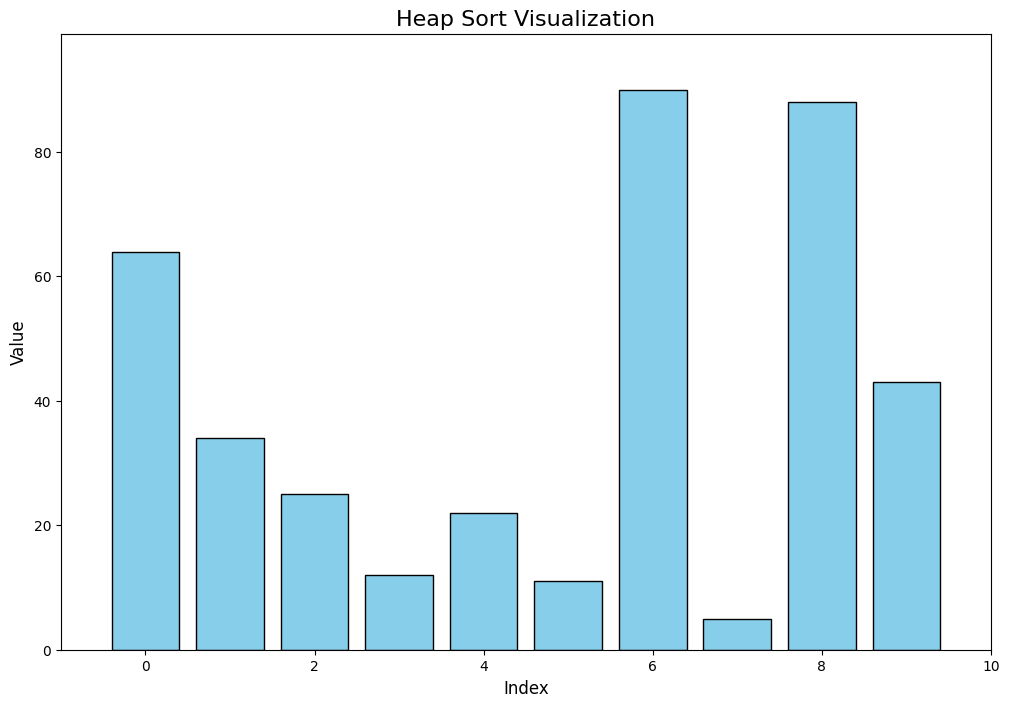

In [30]:
# Run heap sort and collect states
heap_sort_viz(array_to_sort)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the bar plot
bar_container = ax.bar(range(len(my_array)), array_states[0], color='skyblue', edgecolor='black')

# Set axis limits
ax.set_xlim(-1, len(my_array))
ax.set_ylim(0, max(my_array) * 1.1)

# Set title and labels
ax.set_title('Heap Sort Visualization', fontsize=16)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

# Text elements for annotations
text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=10)
phase_text = ax.text(0.02, 0.90, '', transform=ax.transAxes, fontsize=10)
action_text = ax.text(0.02, 0.85, '', transform=ax.transAxes, fontsize=10)


In [31]:
# This will help illustrate the binary tree structure of the heap
def draw_heap_connections(ax, arr):
    n = len(arr)
    connections = []

    for i in range(n):
        left = 2 * i + 1
        right = 2 * i + 2

        if left < n:
            connections.append((i, left))
        if right < n:
            connections.append((i, right))

    return connections

# Initial heap connections
heap_lines = []

In [32]:
def update(frame):
    # Update the heights of the bars
    for i, bar in enumerate(bar_container):
        bar.set_height(array_states[frame][i])

    # Reset all colors
    for bar in bar_container:
        bar.set_color('skyblue')

    # Color the active indices
    active_idx = active_indices[frame]
    if active_idx:
        for idx in active_idx:
            if idx is not None and idx < len(bar_container):
                if len(active_idx) >= 2 and idx == active_idx[0]:
                    bar_container[idx].set_color('green')  # Parent/current node
                elif len(active_idx) >= 2 and idx == active_idx[1]:
                    bar_container[idx].set_color('red')    # Child/swap target
                else:
                    bar_container[idx].set_color('purple') # Other related node

    # Update the text annotations
    text.set_text(f'Step {frame+1}/{len(array_states)}')

    # Show the current phase
    phase = phase_markers[frame]
    if phase == "build":
        phase_text.set_text('Phase: Building Max Heap')
    elif phase == "extract":
        phase_text.set_text('Phase: Extracting from Heap')
    else:
        phase_text.set_text('Phase: Complete')

    # Describe the current action
    if not active_idx:
        action_text.set_text('Action: Initial/Final state')
    elif len(active_idx) >= 2 and active_idx[0] is not None and active_idx[1] is not None:
        if frame > 0 and array_states[frame][active_idx[0]] != array_states[frame-1][active_idx[0]]:
            action_text.set_text(f'Action: Swapping indices {active_idx[0]} and {active_idx[1]}')
        else:
            action_text.set_text(f'Action: Comparing indices {active_idx[0]} and {active_idx[1]}')
    else:
        action_text.set_text(f'Action: Examining node at index {active_idx[0]}')

    # Clear previous heap lines
    for line in heap_lines:
        if line in ax.lines:
            line.remove()
    heap_lines.clear()

    # Draw heap connections if in build phase
    if phase == "build":
        connections = draw_heap_connections(ax, array_states[frame])
        for parent, child in connections:
            line = ax.plot([parent, child], [array_states[frame][parent], array_states[frame][child]],
                         'k-', alpha=0.3)[0]
            heap_lines.append(line)

    # Return the artists to be re-drawn
    # Convert to list if bar_container is a tuple to avoid TypeError
    artists = list(bar_container)
    artists.extend(heap_lines)
    return artists



In [33]:
# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(array_states),
                              interval=500, blit=True, repeat=True)

# Adjust layout
plt.tight_layout()

# Save the animation - make sure ffmpeg is installed
try:
    # First check if we have ffmpeg
    import subprocess
    try:
        subprocess.check_output(['ffmpeg', '-version'])
        ani.save('heapsort_visualization.mp4', writer='ffmpeg', fps=2)
        print("Animation saved successfully!")
    except (subprocess.CalledProcessError, FileNotFoundError):
        print("ffmpeg not found. Trying to use other writers...")
        # Try using other writers that might be available
        try:
            ani.save('heapsort_visualization.gif', writer='pillow', fps=2)
            print("Animation saved as GIF instead.")
        except:
            print("Could not save animation. Display only.")
except Exception as e:
    print(f"Error saving animation: {e}")
    print("Continuing with display only.")

# Display the animation
plt.show()

Animation saved successfully!


<Figure size 640x480 with 0 Axes>

### Optimized heap sort

In [35]:
def sift_down_optimized(arr, i, upper):
    largest = i
    temp = arr[i]  # Store root element to minimize swaps

    while True:
        left = 2 * i + 1
        right = 2 * i + 2
        if left < upper and arr[left] > temp:
            largest = left
        if right < upper and arr[right] >= arr[largest]:
            largest = right

        if largest == i:
            break

        arr[i] = arr[largest]  # Move larger child up
        i = largest

    arr[i] = temp  # Place original root in its correct place

def heap_sort_optimized(arr):
    n = len(arr)

    # Build Max Heap (Bottom-Up Heapify)
    for i in range(n // 2 - 1, -1, -1):
        sift_down_optimized(arr, i, n)

    # Heap Sort
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]  # Swap root with last element
        sift_down_optimized(arr, 0, i)

In [36]:
heapsort_results_optimized = run_sorting_algorithm(heap_sort_optimized, "Optimized Heap Sort")
print(heapsort_results_optimized)

[('Optimized Heap Sort', 'Random array', 4.8160552978515625e-05), ('Optimized Heap Sort', 'Increasing-order sorted array', 3.5762786865234375e-05), ('Optimized Heap Sort', 'Decreasing-order sorted array', 2.956390380859375e-05), ('Optimized Heap Sort', 'Array with duplicate elements', 3.409385681152344e-05)]


## Shell Sort

Shell sort is mainly a variation of Insertion Sort. In insertion sort, we move elements only one position ahead. When an element has to be moved far ahead, many movements are involved. The idea of ShellSort is to allow the exchange of far items. In Shell sort, we make the array h-sorted for a large value of h. We keep reducing the value of h until it becomes 1. An array is said to be h-sorted if all sublists of every h’th element are sorted.

In [37]:
def shell_sort(arr):
    n = len(arr)
    gap = n // 2

    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2

In [38]:
shellsort_results = run_sorting_algorithm(shell_sort, "Shell Sort")
print(shellsort_results)

[('Shell Sort', 'Random array', 4.601478576660156e-05), ('Shell Sort', 'Increasing-order sorted array', 2.288818359375e-05), ('Shell Sort', 'Decreasing-order sorted array', 3.314018249511719e-05), ('Shell Sort', 'Array with duplicate elements', 3.5762786865234375e-05)]


The time complexity of Shell Sort is O(n^2) in its basic form, where the gap is halved in each iteration. However, using different gap reduction strategies can improve this. The worst-case complexity is O(n^2), while the best-case (for an already sorted array) is O(nlogn). The average case complexity ranges from O(nlog n) to O(n^1.25). Shell Sort has a space complexity of O(1), as it sorts the array in place.

### Visual representation

In [39]:
# Test array
my_array = [64, 34, 25, 12, 22, 11, 90, 5, 88, 43]
array_to_sort = my_array.copy()

# Lists to store the states of the array and indices
array_states = []
active_indices = []
gap_values = []

In [40]:
# Snapshot function to capture the current state
def snapshot(arr, active_idx=None, gap=None):
    array_states.append(arr.copy())
    active_indices.append(active_idx if active_idx else [])
    gap_values.append(gap)

In [41]:
# Modified shell sort function to capture visualization states
def shell_sort_viz(arr):
    n = len(arr)
    gap = n // 2

    # Initial state
    snapshot(arr, None, gap)

    while gap > 0:
        # Highlight the current gap value
        snapshot(arr, None, gap)

        for i in range(gap, n):
            temp = arr[i]
            j = i

            # Highlight the current element and its gap partner
            snapshot(arr, [i, i-gap], gap)

            while j >= gap and arr[j - gap] > temp:
                # Highlight the comparison
                snapshot(arr, [j, j-gap], gap)

                # Perform the swap
                arr[j] = arr[j - gap]

                # Capture the state after the swap
                snapshot(arr, [j, j-gap], gap)

                j -= gap

            # Place the temp value in its correct position
            arr[j] = temp

            # Highlight the final position
            snapshot(arr, [j], gap)

        # Reduce the gap
        gap //= 2

    # Final state
    snapshot(arr, None, 0)

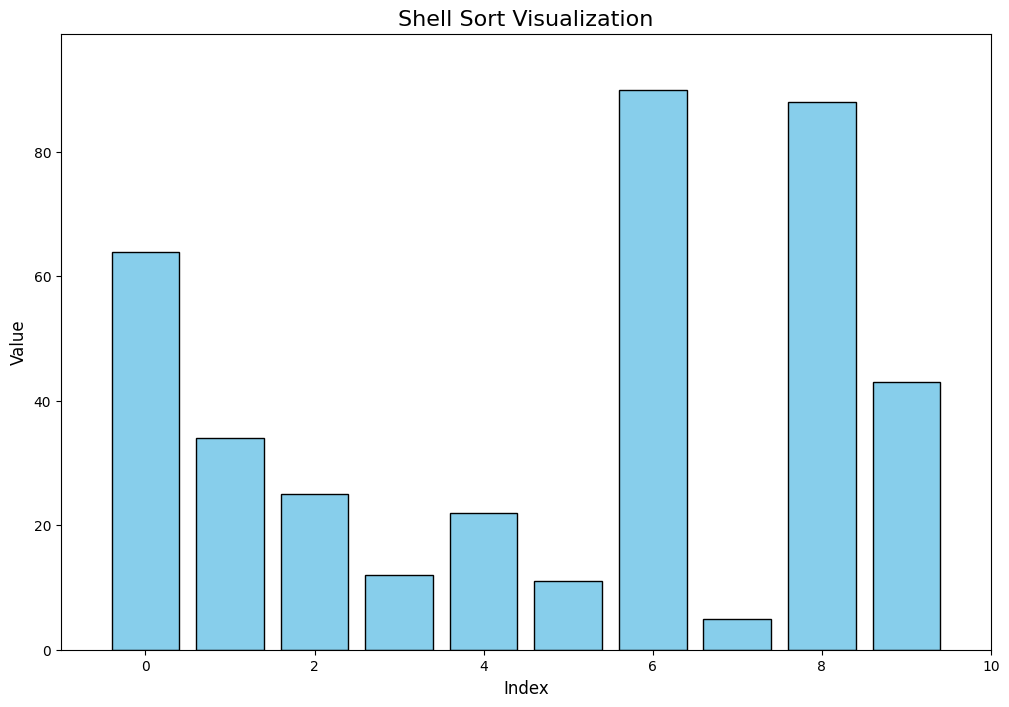

In [42]:
# Run shell sort and collect states
shell_sort_viz(array_to_sort)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the bar plot
bar_container = ax.bar(range(len(my_array)), array_states[0], color='skyblue', edgecolor='black')

# Set axis limits
ax.set_xlim(-1, len(my_array))
ax.set_ylim(0, max(my_array) * 1.1)

# Set title and labels
ax.set_title('Shell Sort Visualization', fontsize=16)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

# Text elements for annotations
text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=10)
gap_text = ax.text(0.02, 0.90, '', transform=ax.transAxes, fontsize=10)
action_text = ax.text(0.02, 0.85, '', transform=ax.transAxes, fontsize=10)

# Gap markers
gap_lines = []

In [43]:
def update(frame):
    # Update the heights of the bars
    for i, bar in enumerate(bar_container):
        bar.set_height(array_states[frame][i])

    # Reset all colors
    for bar in bar_container:
        bar.set_color('skyblue')

    # Color the active indices
    active_idx = active_indices[frame]
    if active_idx:
        for idx in active_idx:
            if idx is not None and idx < len(bar_container) and idx >= 0:
                if len(active_idx) >= 2 and idx == active_idx[0]:
                    bar_container[idx].set_color('green')  # Current element
                elif len(active_idx) >= 2 and idx == active_idx[1]:
                    bar_container[idx].set_color('red')    # Gap partner
                else:
                    bar_container[idx].set_color('purple') # Other related element

    # Update the text annotations
    text.set_text(f'Step {frame+1}/{len(array_states)}')

    # Show the current gap
    gap = gap_values[frame]
    gap_text.set_text(f'Current Gap: {gap}')

    # Describe the current action
    if not active_idx:
        if frame == 0:
            action_text.set_text('Action: Initial state')
        elif frame == len(array_states) - 1:
            action_text.set_text('Action: Final sorted state')
        else:
            action_text.set_text(f'Action: Changed gap to {gap}')
    elif len(active_idx) >= 2:
        if frame > 0 and array_states[frame] != array_states[frame-1]:
            action_text.set_text(f'Action: Moving element from index {active_idx[1]} to {active_idx[0]}')
        else:
            action_text.set_text(f'Action: Comparing indices {active_idx[0]} and {active_idx[1]}')
    elif len(active_idx) == 1:
        action_text.set_text(f'Action: Placed element at index {active_idx[0]}')

    # Clear previous gap lines
    for line in gap_lines:
        if line in ax.lines:
            line.remove()
    gap_lines.clear()

    # Draw gap connections if gap > 0
    if gap > 0:
        y_base = -5  # Base y-coordinate for gap lines
        for i in range(len(array_states[frame])):
            j = i + gap
            if j < len(array_states[frame]):
                # Draw connection between elements that are gap distance apart
                line = ax.plot([i, j], [y_base, y_base], 'k-', alpha=0.3)[0]
                gap_lines.append(line)

    # Return the artists to be re-drawn
    artists = list(bar_container)
    artists.extend(gap_lines)
    return artists


In [44]:
# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(array_states),
                              interval=500, blit=True, repeat=True)

# Adjust layout
plt.tight_layout()

# Save the animation - make sure ffmpeg is installed
try:
    # First check if we have ffmpeg
    import subprocess
    try:
        subprocess.check_output(['ffmpeg', '-version'])
        ani.save('shellsort_visualization.mp4', writer='ffmpeg', fps=2)
        print("Animation saved successfully!")
    except (subprocess.CalledProcessError, FileNotFoundError):
        print("ffmpeg not found. Trying to use other writers...")
        # Try using other writers that might be available
        try:
            ani.save('shellsort_visualization.gif', writer='pillow', fps=2)
            print("Animation saved as GIF instead.")
        except:
            print("Could not save animation. Display only.")
except Exception as e:
    print(f"Error saving animation: {e}")
    print("Continuing with display only.")

# Display the animation
plt.show()

Animation saved successfully!


<Figure size 640x480 with 0 Axes>

### Optimized shell sort

In [45]:
def shell_sort_optimized(arr):
    n = len(arr)
    gap = 1

    while gap < n // 3:
        gap = 3 * gap + 1

    while gap >= 1:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 3

In [46]:
shellsort_results_optimized = run_sorting_algorithm(shell_sort, "Shell Sort Optimized")
print(shellsort_results_optimized)

[('Shell Sort Optimized', 'Random array', 3.7670135498046875e-05), ('Shell Sort Optimized', 'Increasing-order sorted array', 1.3828277587890625e-05), ('Shell Sort Optimized', 'Decreasing-order sorted array', 1.9550323486328125e-05), ('Shell Sort Optimized', 'Array with duplicate elements', 2.0503997802734375e-05)]


## Results

In [47]:
results = [quicksort_results, quicksort_optimized_results, mergesort_results, mergesort_optimized_results, heapsort_results, heapsort_results_optimized, shellsort_results, shellsort_results_optimized]

In [48]:
def plot_results(results):
    plt.figure(figsize=(12, 8))
    markers = ['o', 's', 'D', 'x', '*', 'v', '^', '<']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

    for i, result in enumerate(results):
        for algorithm_name, test_case_name, elapsed_time in result:
            plt.scatter(test_case_name, elapsed_time, label=f"{algorithm_name} - {test_case_name}", marker=markers[i % len(markers)], color=colors[i % len(colors)])

    plt.title("Sorting Algorithm Performance")
    plt.xlabel("Test Case")
    plt.ylabel("Time (seconds)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

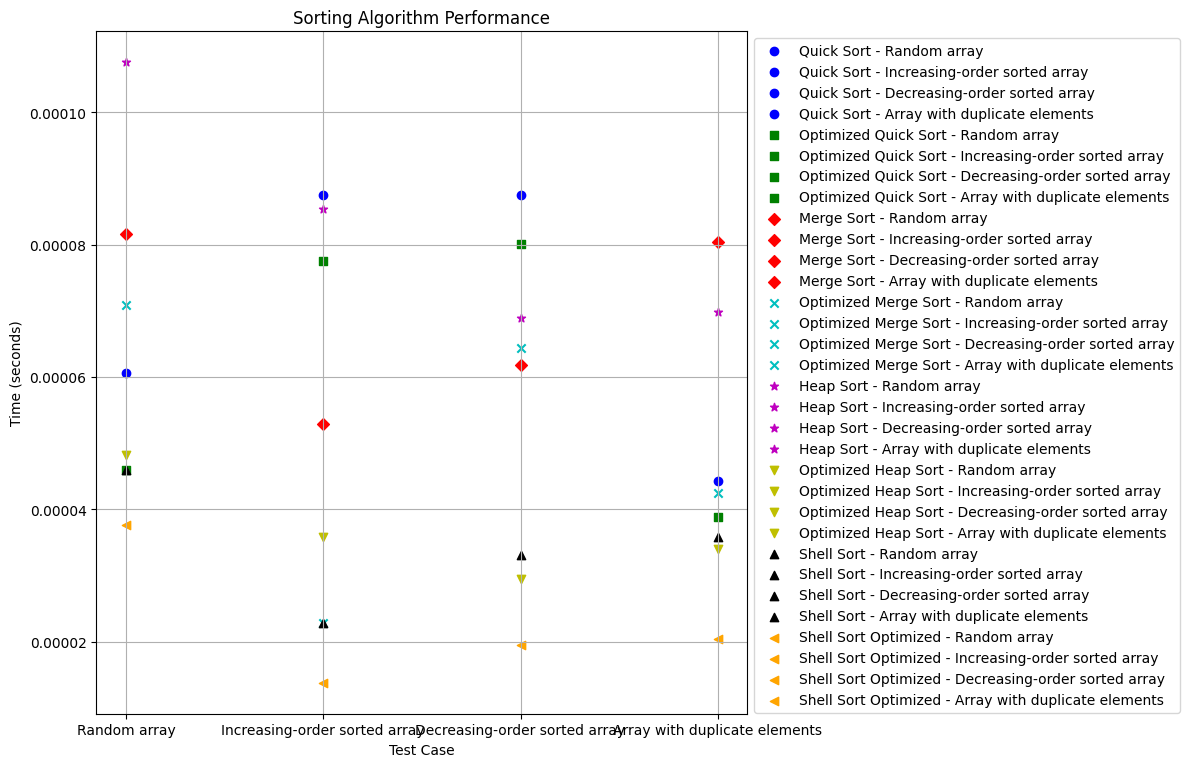

In [49]:
plot_results(results)

## Bibliography:

https://www.youtube.com/watch?v=9KBwdDEwal8&ab_channel=FelixTechTips

https://www.linkedin.com/advice/0/how-do-you-compare-performance-quicksort-other

https://www.youtube.com/watch?v=cVZMah9kEjI&ab_channel=FelixTechTips

https://www.youtube.com/watch?v=R_wDA-PmGE4&ab_channel=FelixTechTips

https://www.youtube.com/watch?v=laYrbOAmuvQ&ab_channel=CodeSavant

https://www.youtube.com/watch?v=0Dg41UEK3Io&ab_channel=KIRUPA
